In [1]:
import cv2
import matplotlib.pyplot as plt
import skimage as ski

In [2]:
img = cv2.imread('robot3.jpg')
img.shape

(1000, 766, 3)

In [3]:
# Image Type Conversion
    # Color Image to Grayscale
    # to Binary
# Geometric Transformations
    # Cropping
    # Scaling
    # Rotation
# Image Arithmetic / Brightness, Contrast Adjustments
    # Addition
    # Subraction
    # Multiplication
    # Division
    # Birghtness & Contrast Adjustment
    # Filteration -> Blurring/Sharpening
# Morphology
    # Structuring Element
    # Dilation
    # Erosion
    # Closing
    # Opening
    # Removing Small Holes
    # Removing Small Objects
    # Region Properties
# Feature Detection
    # Feature Detection -> Extraction
    # Feature Matching

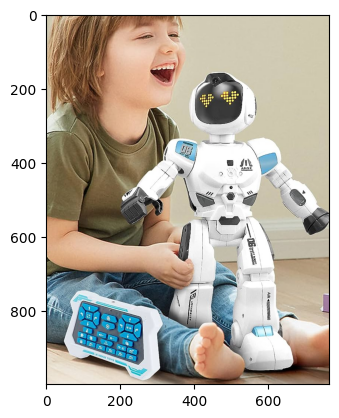

In [4]:
plt.imshow(img[:,:,::-1])

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

# 0.6*R + 0.3*G + 0.1*B

(1000, 766)

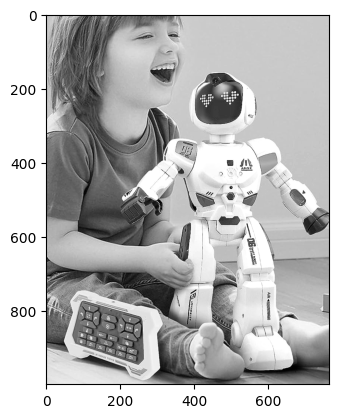

In [6]:
plt.imshow(img_gray, cmap = 'gray')

In [9]:
th, img_bin = cv2.threshold(img_gray, 120,255, cv2.THRESH_BINARY)
img_bin.shape

(1000, 766)

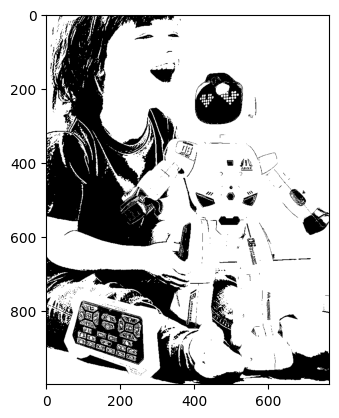

In [10]:
plt.imshow(img_bin, cmap='gray')

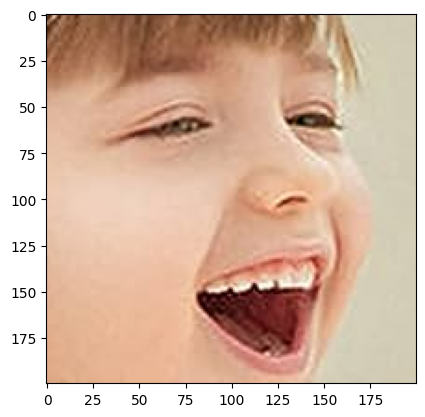

In [14]:
plt.imshow(img[:200, 200:400,::-1])#, cmap='gray')

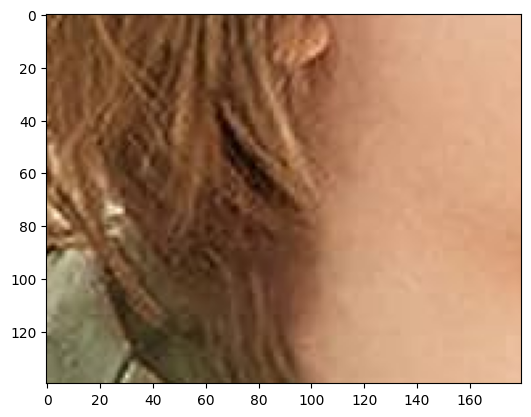

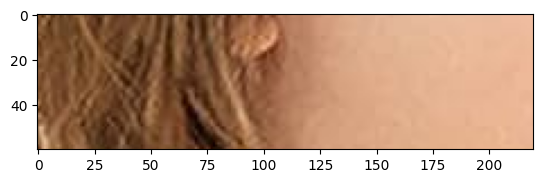

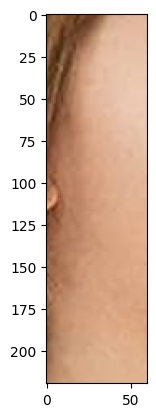

In [18]:
x,y,w,h = (50,150, 180, 140)
plt.imshow(img[y:y+h, x:x+w, ::-1])
plt.show()

x1,y1,x2,y2 = (50,150, 270, 210)
plt.imshow(img[y1:y2, x1:x2, ::-1])
plt.show()

y1,x1,y2,x2 = (50,150, 270, 210)
plt.imshow(img[y1:y2, x1:x2, ::-1])
plt.show()

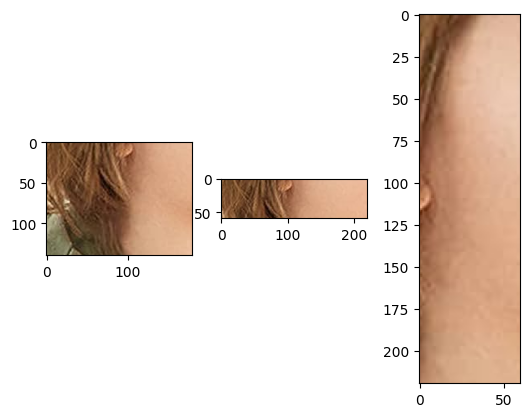

In [19]:
x,y,w,h = (50,150, 180, 140)
plt.subplot(1,3,1)
plt.imshow(img[y:y+h, x:x+w, ::-1])

x1,y1,x2,y2 = (50,150, 270, 210)
plt.subplot(1,3,2)
plt.imshow(img[y1:y2, x1:x2, ::-1])

y1,x1,y2,x2 = (50,150, 270, 210)
plt.subplot(1,3,3)
plt.imshow(img[y1:y2, x1:x2, ::-1])

In [20]:
img.shape

(1000, 766, 3)

In [21]:
img_large = cv2.resize(
    img, (1500,1500), interpolation=cv2.INTER_CUBIC)
img_large.shape

(1500, 1500, 3)

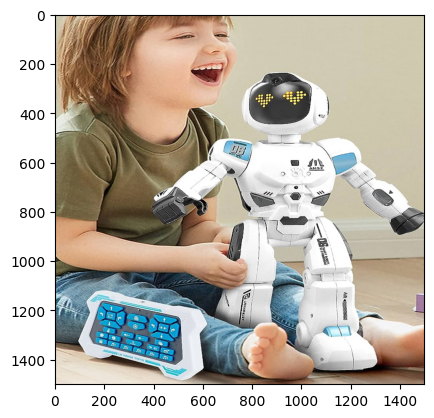

In [22]:
plt.imshow(img_large[:,:,::-1])

In [25]:
img_large = cv2.resize(
    img, (1500,1500), interpolation=cv2.INTER_CUBIC)

img_small = cv2.resize(
    img,(0,0), fx=0.25, fy=0.25, interpolation=cv2.INTER_CUBIC)
img_small.shape

(250, 192, 3)

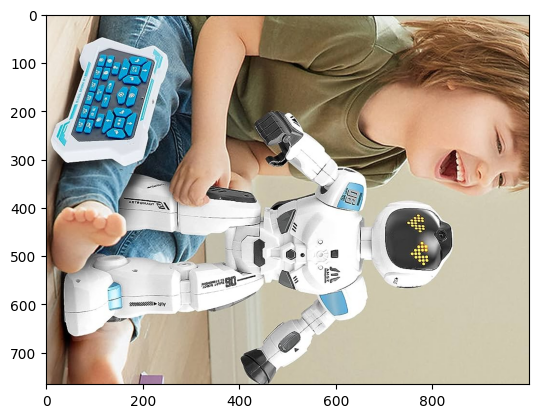

In [26]:
img_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(img_90[:,:,::-1])

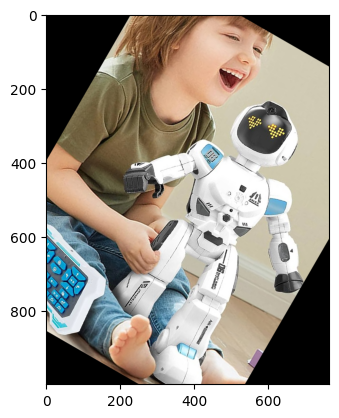

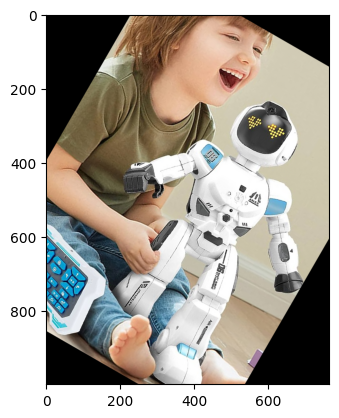

In [36]:
rot_mat = cv2.getRotationMatrix2D(
    center=(img.shape[1]//2,img.shape[0]//2), 
    angle=-30, scale = 1)
img_x = cv2.warpAffine(
    img, rot_mat, dsize=(img.shape[1], img.shape[0]),
    flags=cv2.INTER_LINEAR
)
plt.imshow(img_x[:,:,::-1]); plt.show()

img_x = ski.transform.rotate(img, -30)
plt.imshow(img_x[:,:,::-1])

In [39]:
import numpy as np

(-0.5, 765.5, 999.5, -0.5)

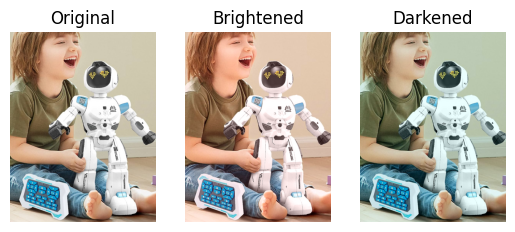

In [42]:
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(img[:,:,::-1]); plt.axis('off')

plt.subplot(1,3,2)
plt.title('Brightened')
plt.imshow(cv2.add(img[:,:,::-1], 20)); plt.axis('off')

plt.subplot(1,3,3)
plt.title('Darkened')
plt.imshow(cv2.subtract(img[:,:,::-1], 20)); plt.axis('off')

(-0.5, 765.5, 999.5, -0.5)

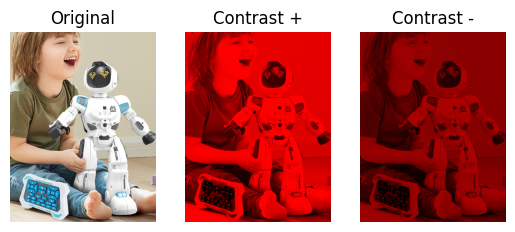

In [44]:
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(img[:,:,::-1]); plt.axis('off')

plt.subplot(1,3,2)
plt.title('Contrast +')
plt.imshow(cv2.multiply(img[:,:,::-1], 1.1)); plt.axis('off')

plt.subplot(1,3,3)
plt.title('Contrast -')
plt.imshow(cv2.divide(img[:,:,::-1], 1.5)); plt.axis('off')

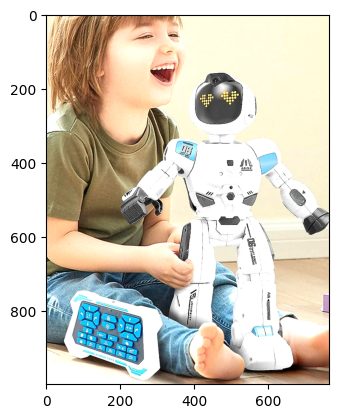

In [52]:
# alpha -> Contrast,  beta -> Brightness
img_cntbrt = cv2.convertScaleAbs(
    img, alpha = 1.25, beta = 0
)
plt.imshow(img_cntbrt[:,:,::-1])

# img_cntbrt = cv2.convertScaleAbs(
#     img, alpha = 1, beta = -140
# )
# plt.imshow(img_cntbrt[:,:,::-1])

# img_cntbrt = cv2.convertScaleAbs(
#     img, alpha = 0.25, beta = 0
# )
# plt.imshow(img_cntbrt[:,:,::-1])

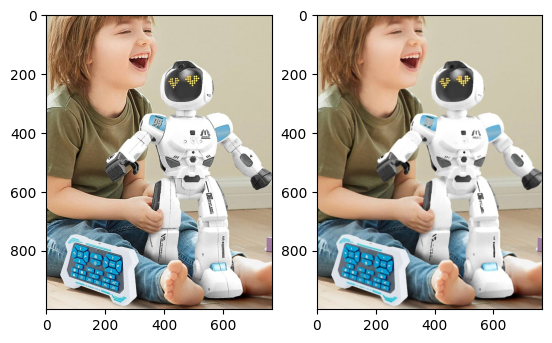

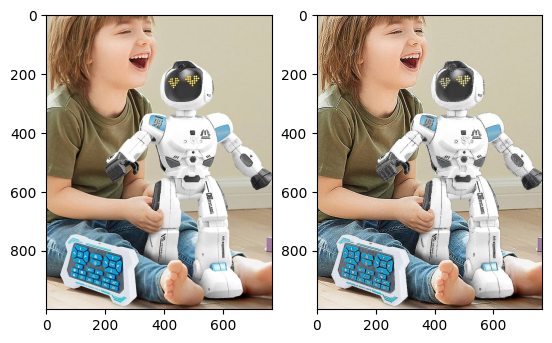

In [74]:
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.subplot(1,2,2)
img_blur = cv2.medianBlur(img, 5)
plt.imshow(img_blur[:,:,::-1])
plt.show()

plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.subplot(1,2,2)
shrp_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
img_sharp = cv2.filter2D(img, ddepth=-1, kernel=shrp_kernel)
plt.imshow(img_sharp[:,:,::-1])